In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt


In [2]:
#at first lets read all csv files and assign them to a variable to ease our job
#and lets review them with head method and count some important values to have a basic insight
#we have an error that cant convert 8,405,837 to int or float so we need to change it with 8.405,837
city=pd.read_csv(r"C:\Users\Abdullah\week2 datasets\City.csv")
city["Population"] = city["Population"].apply(lambda x: x.replace(',', ''))
city["Population"].apply(lambda x: int(x))
city["Users"] = city["Users"].apply(lambda x: x.replace(',', ''))
city["Population"].apply(lambda x: int(x))
city.drop_duplicates(keep="first")


city.head()


,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247


In [3]:
cab_data=pd.read_csv(r"C:\Users\Abdullah\week2 datasets\Cab_Data.csv")
cab_data['Date of Travel'] = pd.to_datetime(cab_data['Date of Travel'],unit = 'D',origin = '1899-12-30')
cab_data.drop_duplicates(keep="first")
cab_data.dropna(how='all')
#if there is a row contains all nan value we drop it
cab_data.head(5)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
cab_data["City"].value_counts()

NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: City, dtype: int64

In [5]:
customer_id=pd.read_csv(r"C:\Users\Abdullah\week2 datasets\Customer_ID.csv")

customer_id.drop_duplicates(keep="first")

customer_id.head(5)


,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [6]:
customer_id["Gender"].value_counts()

Male      26562
Female    22609
Name: Gender, dtype: int64

In [7]:
transaction_id=pd.read_csv(r"C:\Users\Abdullah\week2 datasets\Transaction_ID.csv")
transaction_id.drop_duplicates(keep="first")

transaction_id.head(5)


,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [8]:
transaction_id["Payment_Mode"].value_counts()

Card    263991
Cash    176107
Name: Payment_Mode, dtype: int64

In [9]:
#now lets check data quality if there are NaN or null values and see the data types
a=[(city.isnull().sum()),city.info()]
b=[(cab_data.isnull().sum()),cab_data.info()]
c=[(customer_id.isnull().sum()),customer_id.info()]
d=[(transaction_id.isnull().sum()),transaction_id.info()]
print(a,b,c,d)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory 

In [10]:
#at first glance it seems yellow cab is better at profit per km 
#added a column named "Profit per km" in order to determine which company is better per km profit
cab_data["Profit per KM"]=(cab_data["Price Charged"]-cab_data["Cost of Trip"])/(cab_data["KM Travelled"])
cab_data.head(3)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit per KM
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,1.882266
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,0.826904
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,3.049558


In [11]:
#now lets find average profit per km by company name to determine which cab is preferrable based on our hypotesis
pc=cab_data.loc[cab_data["Company"]=="Pink Cab","Profit per KM"].mean()
yc=cab_data.loc[cab_data["Company"]=="Yellow Cab","Profit per KM"].mean()
strpc=str(pc)
stryc=str(yc)
print("Average Profit for KM for Pink Cab is "+ strpc," ","Average Profit for KM for Yellow Cab is "+ stryc)

Average Profit for KM for Pink Cab is 2.769907700396525   Average Profit for KM for Yellow Cab is 7.105507808353063


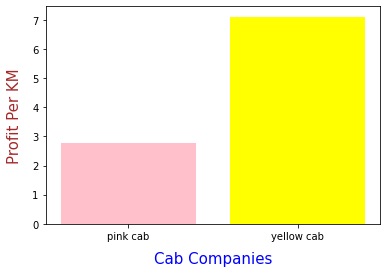

In [12]:
plt.xlabel("Cab Companies",fontsize=15,color='blue',labelpad=10)
plt.ylabel("Profit Per KM",fontsize=15,color='brown',labelpad=10)
plt.bar(["pink cab","yellow cab"],[pc,yc],color=["pink","yellow"]);


#as we see yellow cab has much profit per KM comparing to pink cab

In [13]:
#so lets create master data using 4 dataframe to one using joins based on common columns
merged1=pd.merge(city,cab_data,on='City',how='outer')
merged2=pd.merge(customer_id,transaction_id,on='Customer ID',how='outer')
merged2.head()


,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode
0,29290,Male,28,10813,10000011,Card
1,29290,Male,28,10813,10351127,Cash
2,29290,Male,28,10813,10412921,Card
3,27703,Male,27,9237,10000012,Card
4,27703,Male,27,9237,10320494,Card


In [14]:
merged1.head()

,City,Population,Users,Transaction ID,Date of Travel,Company,KM Travelled,Price Charged,Cost of Trip,Profit per KM
0,NEW YORK NY,8405837,302149,10000139.0,2016-01-08,Pink Cab,17.85,242.90,198.135,2.507843
1,NEW YORK NY,8405837,302149,10000140.0,2016-01-09,Pink Cab,25.30,407.21,255.530,5.995257
2,NEW YORK NY,8405837,302149,10000141.0,2016-01-06,Pink Cab,16.32,236.41,186.048,3.085907
3,NEW YORK NY,8405837,302149,10000142.0,2016-01-04,Pink Cab,12.43,194.61,144.188,4.056476
4,NEW YORK NY,8405837,302149,10000143.0,2016-01-09,Pink Cab,29.70,434.57,350.460,2.831987


In [15]:
#NOW WE HAVE A MASTER DF MERGING TO MERGED DATAFRAME
masterdf=pd.merge(merged1,merged2,on='Transaction ID',how='outer')
masterdf.dropna
masterdf.head(12)

,City,Population,Users,Transaction ID,Date of Travel,Company,KM Travelled,Price Charged,Cost of Trip,Profit per KM,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode
0,NEW YORK NY,8405837,302149,10000139.0,2016-01-08,Pink Cab,17.85,242.90,198.135,2.507843,2416.0,Male,28.0,21399.0,Cash
1,NEW YORK NY,8405837,302149,10000140.0,2016-01-09,Pink Cab,25.30,407.21,255.530,5.995257,2060.0,Male,18.0,8149.0,Card
2,NEW YORK NY,8405837,302149,10000141.0,2016-01-06,Pink Cab,16.32,236.41,186.048,3.085907,1451.0,Male,35.0,23989.0,Card
3,NEW YORK NY,8405837,302149,10000142.0,2016-01-04,Pink Cab,12.43,194.61,144.188,4.056476,1609.0,Male,30.0,23036.0,Card
4,NEW YORK NY,8405837,302149,10000143.0,2016-01-09,Pink Cab,29.70,434.57,350.460,2.831987,2927.0,Male,33.0,14520.0,Cash
5,NEW YORK NY,8405837,302149,10000144.0,2016-01-12,Pink Cab,19.00,305.81,214.700,4.795263,2626.0,Male,18.0,30401.0,Card
6,NEW YORK NY,8405837,302149,10000145.0,2016-01-02,Pink Cab,2.10,37.18,21.420,7.504762,502.0,Male,28.0,15285.0,Cash
7,NEW YORK NY,8405837,302149,10000146.0,2016-01-03,Pink Cab,16.52,290.52,168.504,7.385956,2571.0,Male,33.0,4620.0,Card
8,NEW YORK NY,8405837,302149,10000147.0,2016-01-08,Pink Cab,27.30,439.40,294.840,5.295238,769.0,Male,63.0,29758.0,Cash
9,NEW YORK NY,8405837,302149,10000148.0,2016-01-06,Pink Cab,24.70,325.27,276.640,1.968826,373.0,Male,27.0,5070.0,Cash


In [16]:
#LETS CHECK THE CORRELATIONS BETWEEN COLUMNS IN DF BEFORE VISUALIZING THE RELEVANT ONES
masterdf.corr()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Profit per KM,Customer ID,Age,Income (USD/Month)
Transaction ID,1.000000,-0.001429,-0.052902,-0.003462,-0.110524,-0.021289,-0.001060,-0.000935
KM Travelled,-0.001429,1.000000,0.835753,0.981848,-0.000538,0.000389,-0.000369,-0.000544
Price Charged,-0.052902,0.835753,1.000000,0.859812,0.473222,-0.177324,-0.003084,0.003228
Cost of Trip,-0.003462,0.981848,0.859812,1.000000,0.031053,0.003077,-0.000189,-0.000633
Profit per KM,-0.110524,-0.000538,0.473222,0.031053,1.000000,-0.394133,-0.006428,0.008159
Customer ID,-0.021289,0.000389,-0.177324,0.003077,-0.394133,1.000000,-0.002161,-0.005834
Age,-0.001060,-0.000369,-0.003084,-0.000189,-0.006428,-0.002161,1.000000,-0.000573
Income (USD/Month),-0.000935,-0.000544,0.003228,-0.000633,0.008159,-0.005834,-0.000573,1.000000


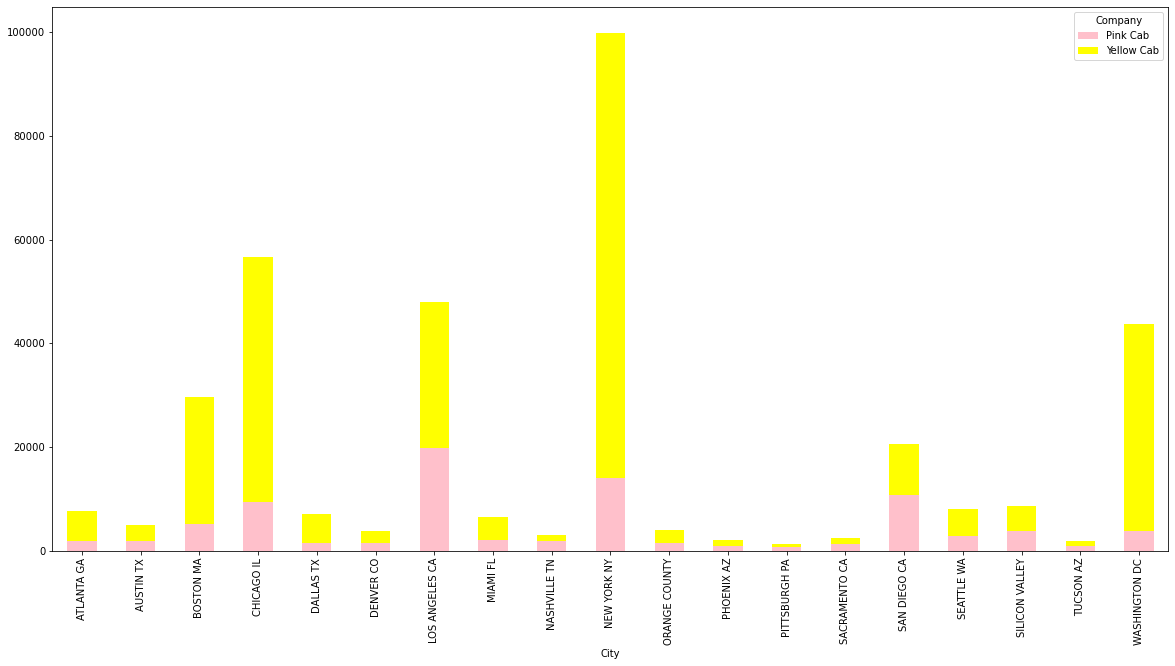

In [31]:
#CHECKED COMPANY'S TOTAL USERS FOR EACH CITY 
citysum=masterdf.groupby(by=['City','Company']).count()['Users'].unstack("Company")

citysum.plot(kind="bar", figsize=(20,10),color=["pink","yellow"],stacked=True);




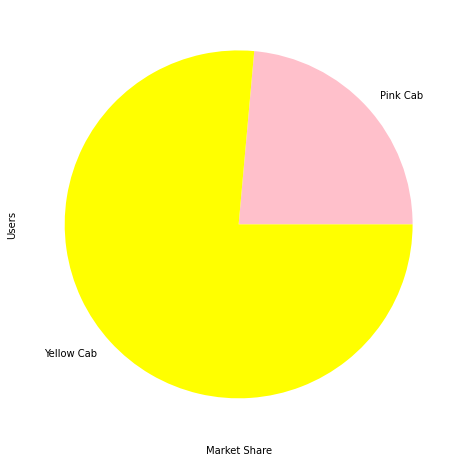

In [30]:
# total market share 
#as we see yellow cab dominates the current market .
piesum=masterdf.groupby(('Company'))
piesum=piesum.count()['Users']
plt.xlabel('Market Share')
piesum.plot(kind="pie",colors=["pink","yellow"],figsize=(10,8));


In [19]:
masterdf["Income (USD/Month)"].mean()
masterdf["Income (USD/Month)"].max()

35000.0

In [20]:
#now lets check the relation between income and cab usage stats 
#to categorize incomes we found the mean income value above
#mean value is 15000 , max val is 35000 so we categorize income below;


def incomecomparison(income):
    if income <10000:
        return "Poor"
    elif income <=25000:
        return "Mid income"
    else:
        return "Rich"
    
a=masterdf["Income (USD/Month)"].apply(incomecomparison)


In [21]:
masterdf["Income (USD/Month)"]=a
masterdf.head()

,City,Population,Users,Transaction ID,Date of Travel,Company,KM Travelled,Price Charged,Cost of Trip,Profit per KM,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode
0,NEW YORK NY,8405837,302149,10000139.0,2016-01-08,Pink Cab,17.85,242.90,198.135,2.507843,2416.0,Male,28.0,Mid income,Cash
1,NEW YORK NY,8405837,302149,10000140.0,2016-01-09,Pink Cab,25.30,407.21,255.530,5.995257,2060.0,Male,18.0,Poor,Card
2,NEW YORK NY,8405837,302149,10000141.0,2016-01-06,Pink Cab,16.32,236.41,186.048,3.085907,1451.0,Male,35.0,Mid income,Card
3,NEW YORK NY,8405837,302149,10000142.0,2016-01-04,Pink Cab,12.43,194.61,144.188,4.056476,1609.0,Male,30.0,Mid income,Card
4,NEW YORK NY,8405837,302149,10000143.0,2016-01-09,Pink Cab,29.70,434.57,350.460,2.831987,2927.0,Male,33.0,Mid income,Cash


<AxesSubplot:xlabel='Income (USD/Month)', ylabel='Total Users per Income Groups'>

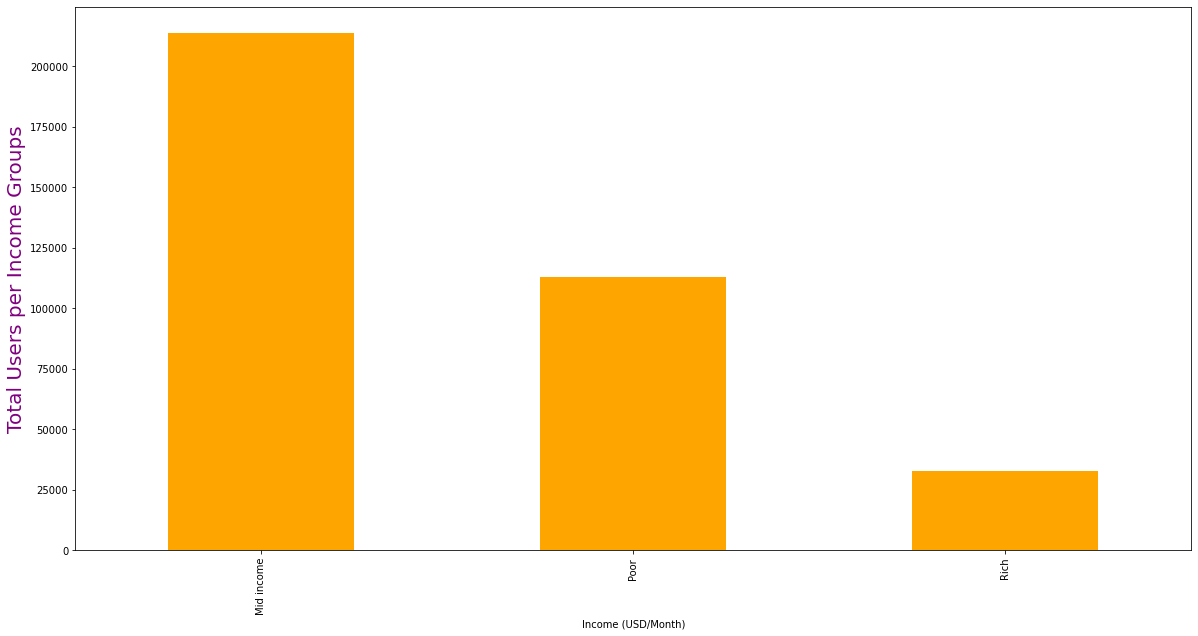

In [22]:
#total users per income groups
incusers=masterdf.groupby("Income (USD/Month)").count()['Users']
incusers.to_frame()
plt.ylabel('Total Users per Income Groups',fontsize=20,color="purple")
incusers.plot(kind="bar", figsize=(20,10),color=["orange"])

<AxesSubplot:xlabel='Income (USD/Month),Company', ylabel='Total Users per Income Groups'>

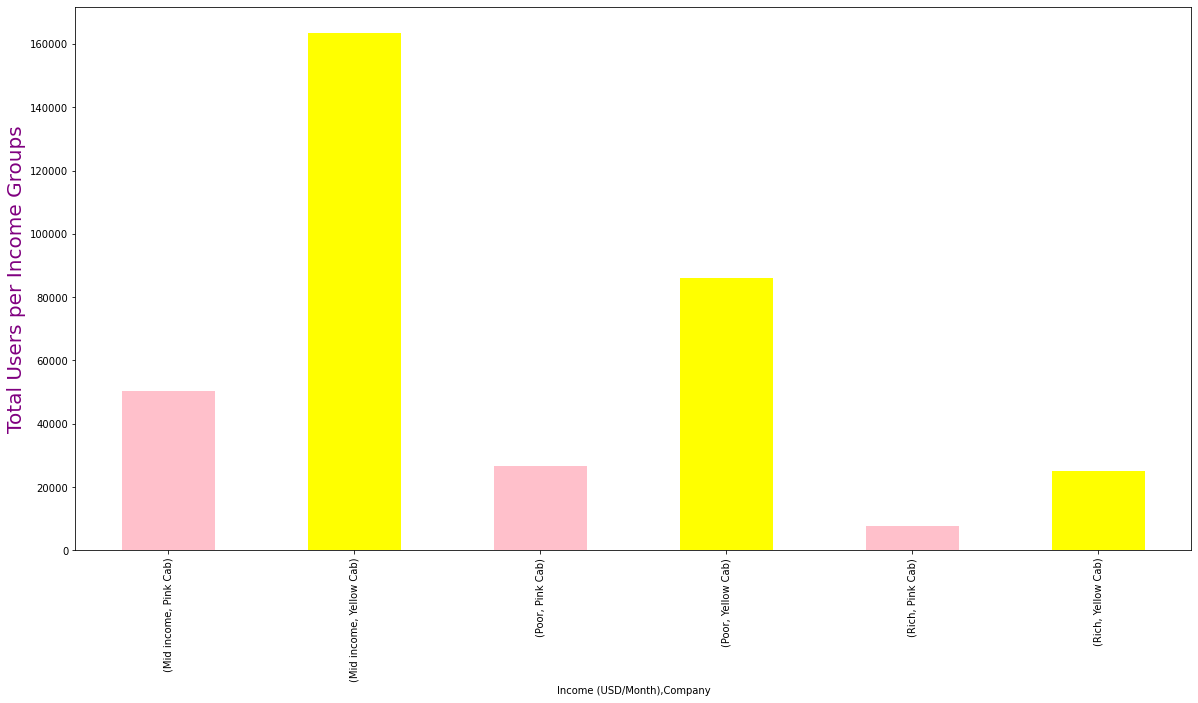

In [33]:
#total users per income groups for each company
#yellow cab has largest number of user in the mid income group which prefers using cab more than other income groups
incusers_company=masterdf.groupby(["Income (USD/Month)","Company"]).count()['Users']
incusers_company.to_frame()
plt.ylabel('Total Users per Income Groups',fontsize=20,color="purple")
incusers_company.plot(kind="bar", figsize=(20,10),color=["pink","yellow"])

<AxesSubplot:xlabel='Gender', ylabel='Total Users per Gender Groups'>

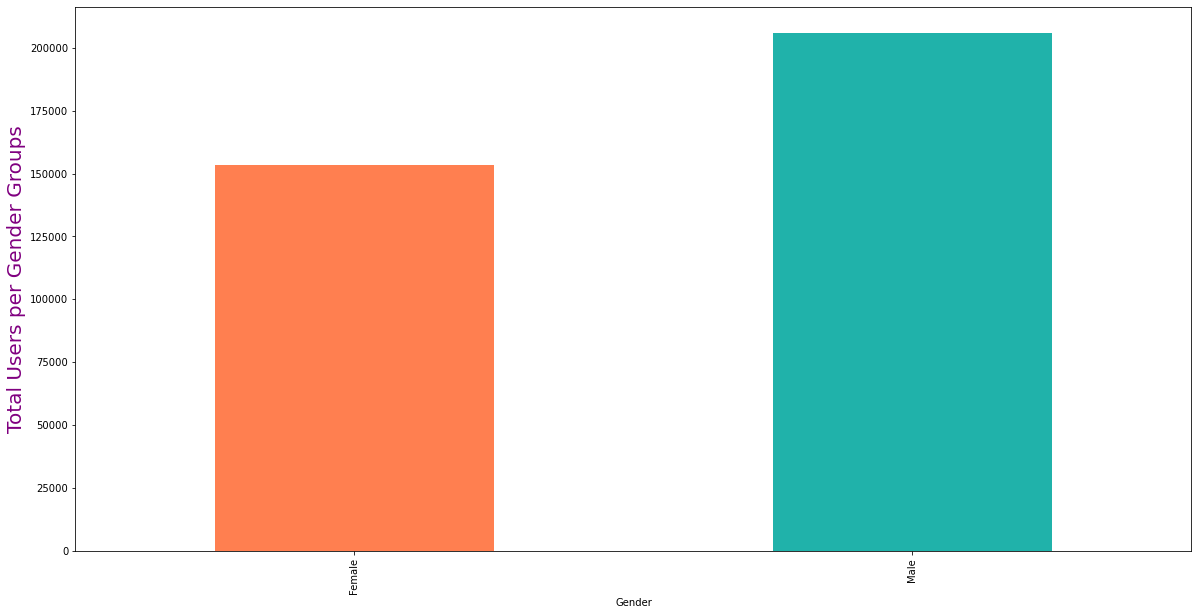

In [23]:
#first i took a glance to total users per genders
genusers=masterdf.groupby("Gender").count()['Users']
genusers.to_frame()
plt.ylabel('Total Users per Gender Groups',fontsize=20,color="purple")
genusers.plot(kind="bar", figsize=(20,10),color=["coral","lightseagreen"])

<AxesSubplot:xlabel='Gender,Company', ylabel='Total Users per Gender Groups'>

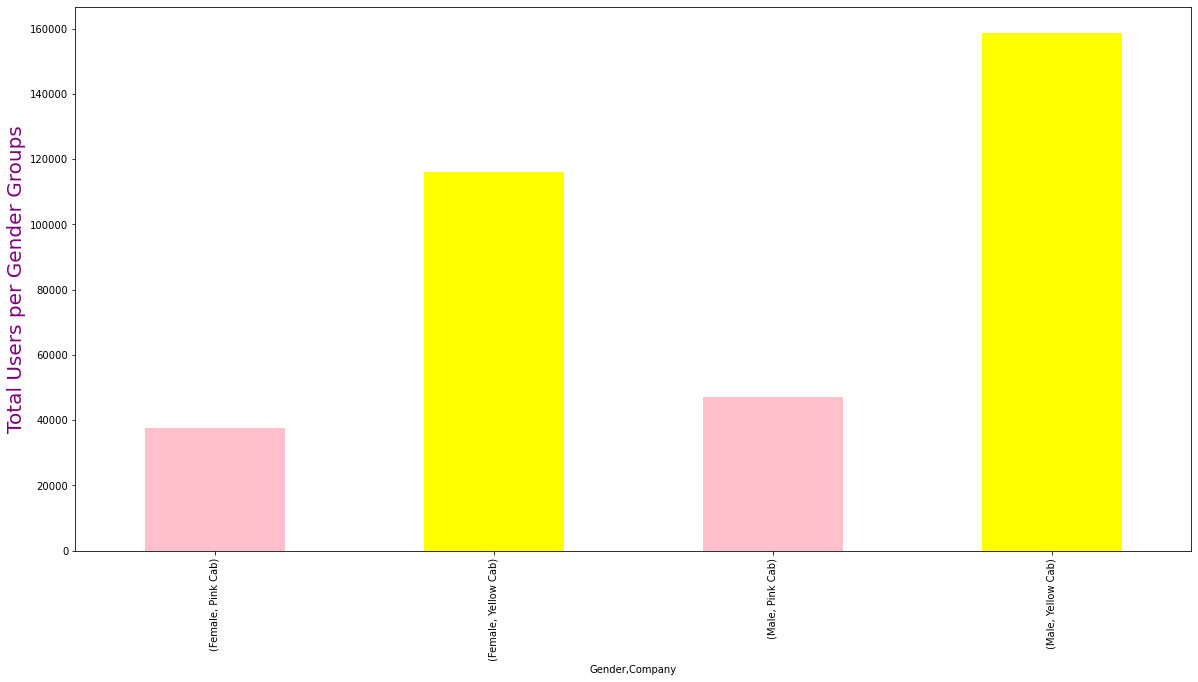

In [24]:
#female users have a tendency to use pink cab more often?
gender_cab=masterdf.groupby(by=['Gender','Company']).count()['Users']
gender_cab.to_frame()
plt.ylabel('Total Users per Gender Groups',fontsize=20,color="purple")
gender_cab.plot(kind="bar",stacked=True, figsize=(20,10),color=("pink","yellow"))
#as we see from bar chart below there is no such tendency for female users

# now lets checked the total cab users per year
#code failed !!
#in order to divide datetime to year i used another method below
dfcopy=masterdf.copy()
t2016=pd.date_range("2016-01-01", periods=365, freq="D").to_series().array
t2017=pd.date_range("2017-01-01", periods=365, freq="D").to_series().array
t2018=pd.date_range("2018-01-01", periods=365, freq="D").to_series().array
def yearindicator(i):
    for i in dfcopy["Date of Travel"]:
        if i in t2016:
            return "2016"
        elif i in t2017:
            return "2017"
        elif i in t2018:
            return "2018"
        else:
            return "error"

time_user=dfcopy["Date of Travel"].apply(yearindicator)
time_user


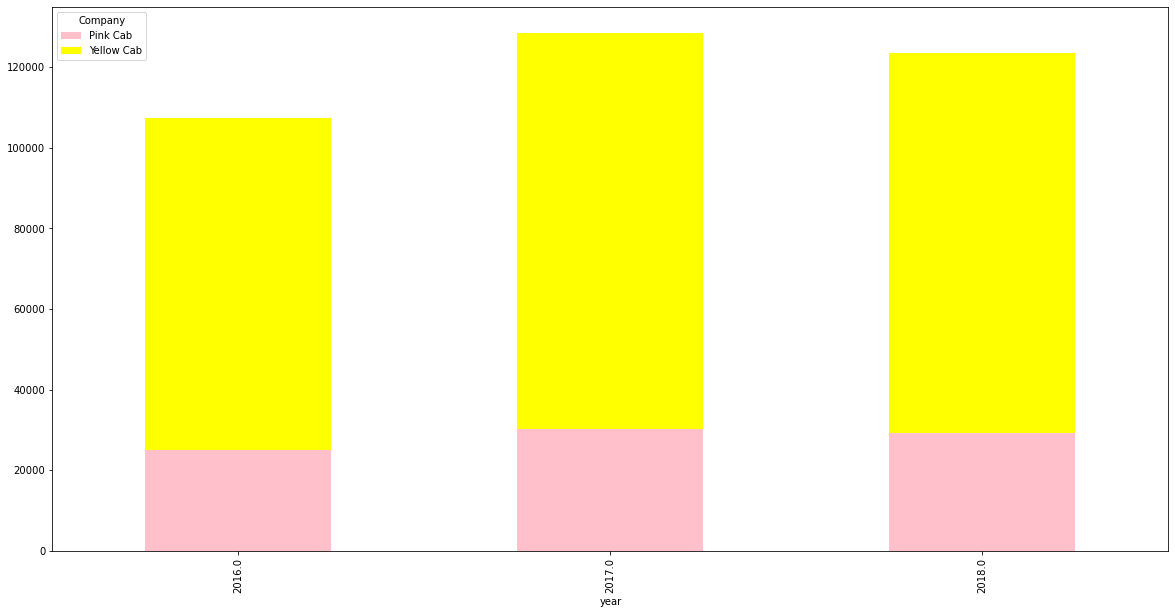

In [34]:
#now lets checked the total cab users per year
#i added a new column called "year"
#as we see yellow cab has more users than pink cab in each year
masterdf['year'] = masterdf['Date of Travel'].dt.year
masterdf['year']
year_users=masterdf.groupby(by=['year','Company']).count()['Users'].unstack("Company")
year_users.plot(kind="bar", figsize=(20,10),color=["pink","yellow"],stacked=True);

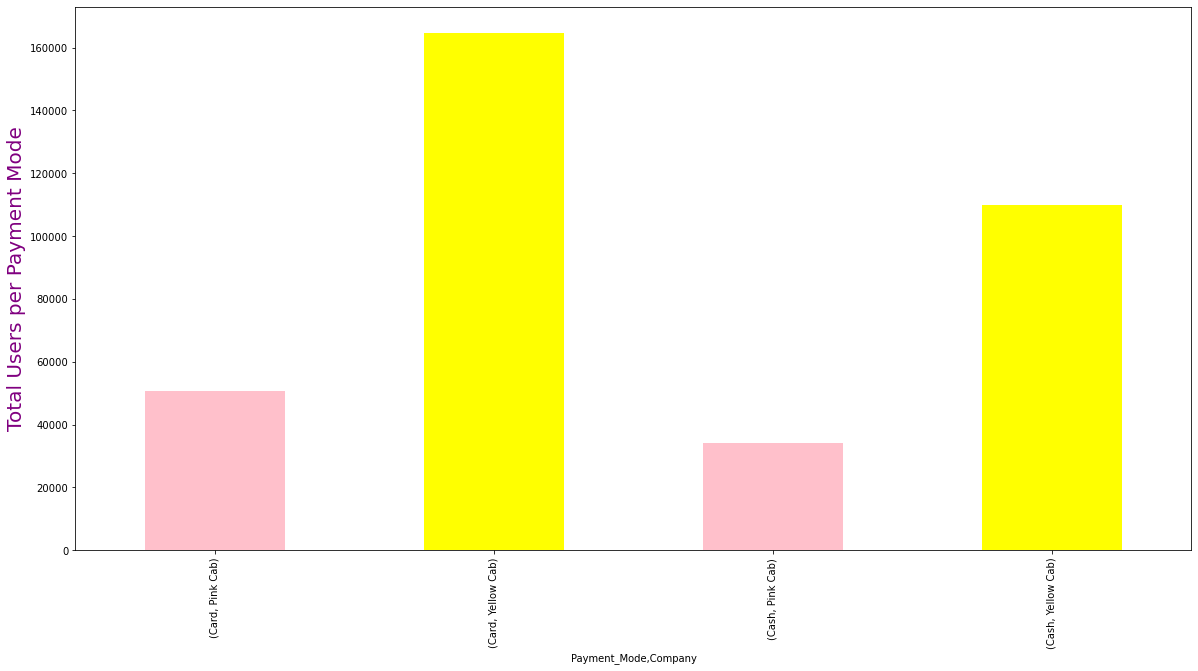

In [35]:
#lets check cab company's total users per payment mode
payment_cab=masterdf.groupby(by=['Payment_Mode','Company']).count()['Users']
payment_cab.to_frame()
plt.ylabel('Total Users per Payment Mode',fontsize=20,color="purple")
payment_cab.plot(kind="bar",stacked=True, figsize=(20,10),color=("pink","yellow"));

In [27]:
#age and cab using relation diagram
#ages grouped into 3 different group using a simple function
def agecomparison(age):
    if age <30:
        return "Young"
    elif age <=50:
        return "Mid Aged"
    else:
        return "Old"
    
a=masterdf["Age"].apply(agecomparison)
masterdf["Age"]=a
masterdf.head()

,City,Population,Users,Transaction ID,Date of Travel,Company,KM Travelled,Price Charged,Cost of Trip,Profit per KM,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,year
0,NEW YORK NY,8405837,302149,10000139.0,2016-01-08,Pink Cab,17.85,242.90,198.135,2.507843,2416.0,Male,Young,Mid income,Cash,2016.0
1,NEW YORK NY,8405837,302149,10000140.0,2016-01-09,Pink Cab,25.30,407.21,255.530,5.995257,2060.0,Male,Young,Poor,Card,2016.0
2,NEW YORK NY,8405837,302149,10000141.0,2016-01-06,Pink Cab,16.32,236.41,186.048,3.085907,1451.0,Male,Mid Aged,Mid income,Card,2016.0
3,NEW YORK NY,8405837,302149,10000142.0,2016-01-04,Pink Cab,12.43,194.61,144.188,4.056476,1609.0,Male,Mid Aged,Mid income,Card,2016.0
4,NEW YORK NY,8405837,302149,10000143.0,2016-01-09,Pink Cab,29.70,434.57,350.460,2.831987,2927.0,Male,Mid Aged,Mid income,Cash,2016.0


<AxesSubplot:xlabel='Age,Company', ylabel='Total Users per Age Groups'>

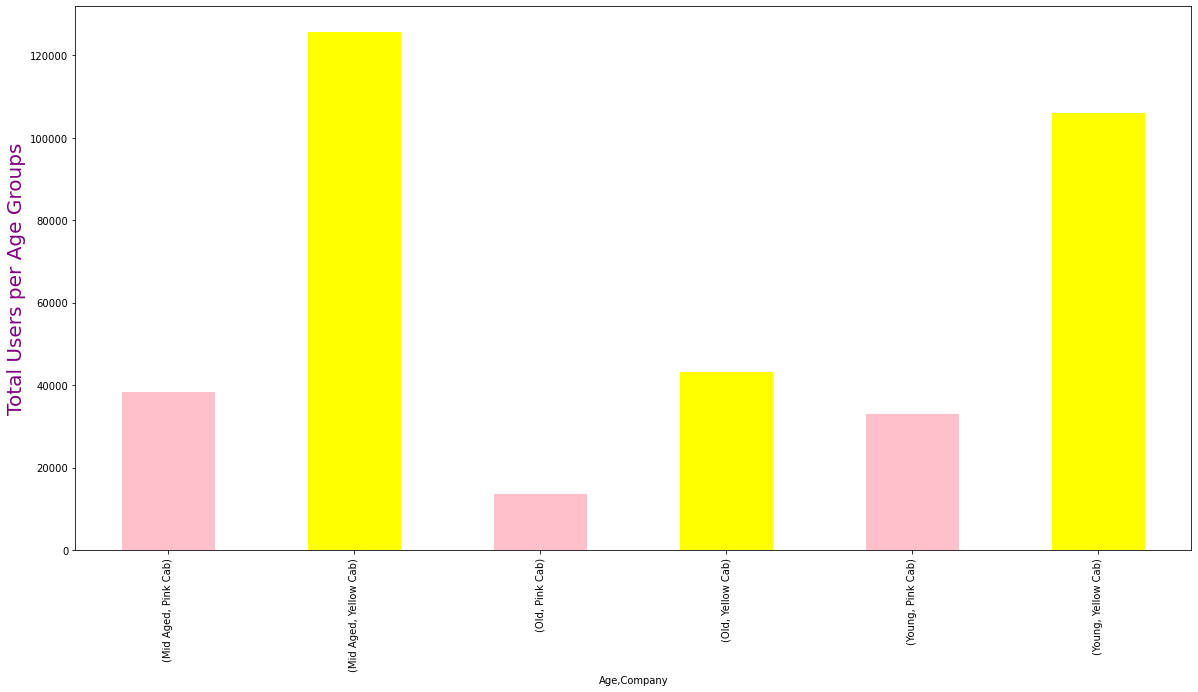

In [28]:
#yellow cab is preferred mostly by mid aged users
age_cab=masterdf.groupby(by=['Age','Company']).count()['Users']
age_cab.to_frame()
plt.ylabel('Total Users per Age Groups',fontsize=20,color="purple")
age_cab.plot(kind="bar",stacked=True, figsize=(20,10),color=("pink","yellow"))

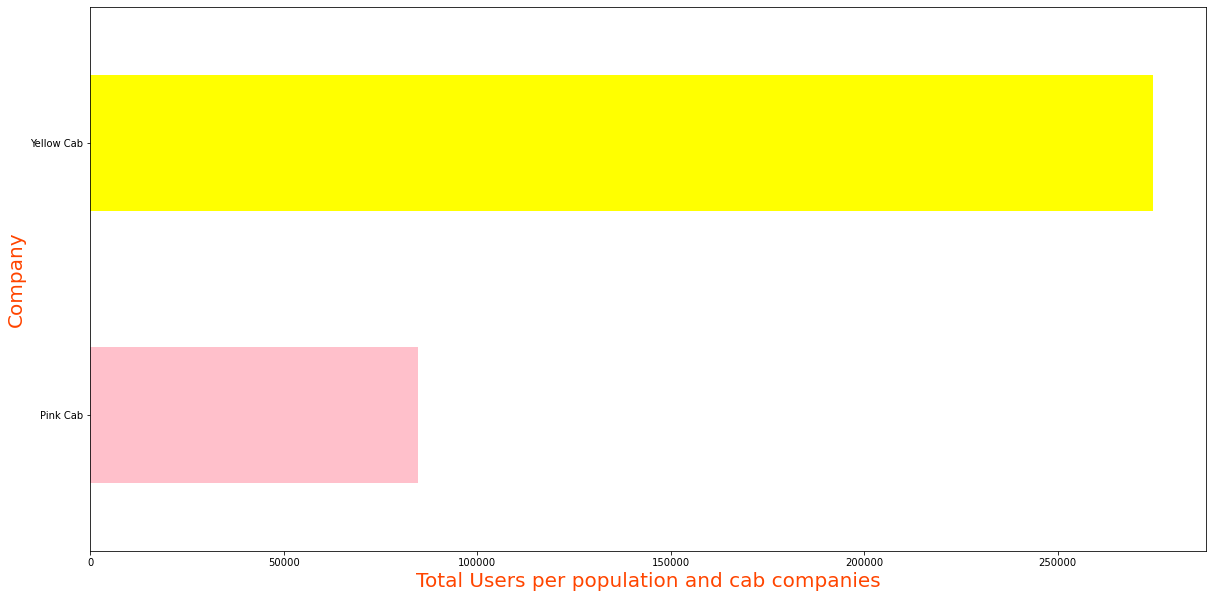

In [36]:
pop_cab=masterdf.groupby(by=['Company']).count()['Population']
pop_cab.to_frame()
plt.xlabel('Total Users per population and cab companies',fontsize=20,color="orangered")
plt.ylabel('Cab Companies',fontsize=20,color="orangered")

pop_cab.plot(kind="barh",stacked=True, figsize=(20,10),color=("pink","yellow"));
#as we can see yellow cab has a bigger market potential than the pink cab 

 In conclusion based on our Exploratory Data Analysis , XYZ company should invest in yellow cab because in every aspect ,
 yellow cab is better and having more potential than the pink cab has.